### Import Libary
Di sini kita menggunakan 3 buah library, yaitu pandas, matlpotlib, sklearn, dan numpy. Di sini kita menggunakan pandas untuk melakukan proses pengeditan atau manipulasi data. Matplotlib di sini kita gunakan dengan tujuan untuk membentuk visualiasi pada data yang bentuknya histogram. Lalu, di sini juga kita menggunakan sklearn yang tujuannya untuk melakukan algoritma Clustering. Dan numpy kita gunakan untuk melakukan manipulasi data yang berbentuk numerik.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

### Membaca Dataset CSV
Di sini kita akan mengambil data dari dataset picks_bans.csv dan heroes.csv menggunakan library Pandas. Kita gunakan function pd.read_csv() pada variable pick_bans dan heroes yang tujuanya agar masing-masing variable mampu menyimpan data dari dataset tersebut. Sehingga bisa kita lakukan analisis menggunakan metode K-Means.

In [83]:
pick_bans = pd.read_csv("picks_bans.csv")
heroes = pd.read_csv("heroes.csv")

### Merge Dataset
Di sini, kita akan melakukan proses penggabungan dari dua dataset yang sebelumnya sudah kita panggil dan simpan pada variable pick_bans dan heroes. Lalu, kita gabungkan berdasarkan kolom hero_id pada dataset pick_bans dan kolom id yanbg terdapat pada dataset heroes.

In [87]:
merged_data = pd.merge(pick_bans, heroes, left_on="hero_id", right_on="id")

### Menjumlahkan Pick dan Ban Hero
Di sini, kita akan melakukan proses penghitungan pick dan ban pada masing-masing hero. Kita mengelompokkan data berdasarkan hero_id dan localized_name. Lalu, kita menyimpannya pada variable hero_pick_counts. Selain itu, kita buat variable heor_ban_counts untuk menyimpan hero yang diban.

In [91]:
hero_pick_counts = merged_data.groupby(['hero_id', 'localized_name'])['is_pick'].sum().reset_index()
hero_pick_counts.columns = ['hero_id', 'localized_name', 'total_picks']
hero_ban_counts = merged_data.groupby(['hero_id', 'localized_name'])['is_pick'].apply(lambda x: len(x) - x.sum()).reset_index()
hero_ban_counts.columns = ['hero_id', 'localized_name', 'total_bans']

### Analisis Menggunakan K-Means
Di sini, kita akan menggunkan algoritma K-Means untuk membagi hero ke dalam 3 Cluster. Cluster 1 kita gunakan untuk hero yang frekuensi pick dan ban tinggi. Cluster 2 kita gunakan untuk hero yang frekuensi pick dan ban sedang. Dan Cluster 2 kita gunakan untuk hero yang frekuensi pick dan ban rendah.

In [73]:
hero_stats = pd.merge(hero_pick_counts, hero_ban_counts, on=['hero_id', 'localized_name'])
X = hero_stats[['total_picks', 'total_bans']].values
kmeans = KMeans(n_clusters=3, random_state=42)
hero_stats['cluster'] = kmeans.fit_predict(X)
hero_stats

,hero_id,localized_name,total_picks,total_bans,cluster
0,1,Anti-Mage,1057,1924,1
1,2,Axe,2587,1531,1
2,3,Bane,1310,1866,1
3,4,Bloodseeker,757,1352,1
4,5,Crystal Maiden,5413,953,1
...,...,...,...,...,...
120,131,Ring Master,2,0,1
121,135,Dawnbreaker,1352,1038,1
122,136,Marci,2192,4037,0
123,137,Primal Beast,2671,6471,2


### Visualiasi Data Menggunakan Chart
Di sini, kita akan menampilkan visualisasi data dalam bentuk bar chart yang arahnya horizontal atau dari kiri ke kanan. Kita menampilkan char tersebut dengan menggunakan library Matplotlib. Kita menampilkan total pick dan ban dari masing-masing hero.

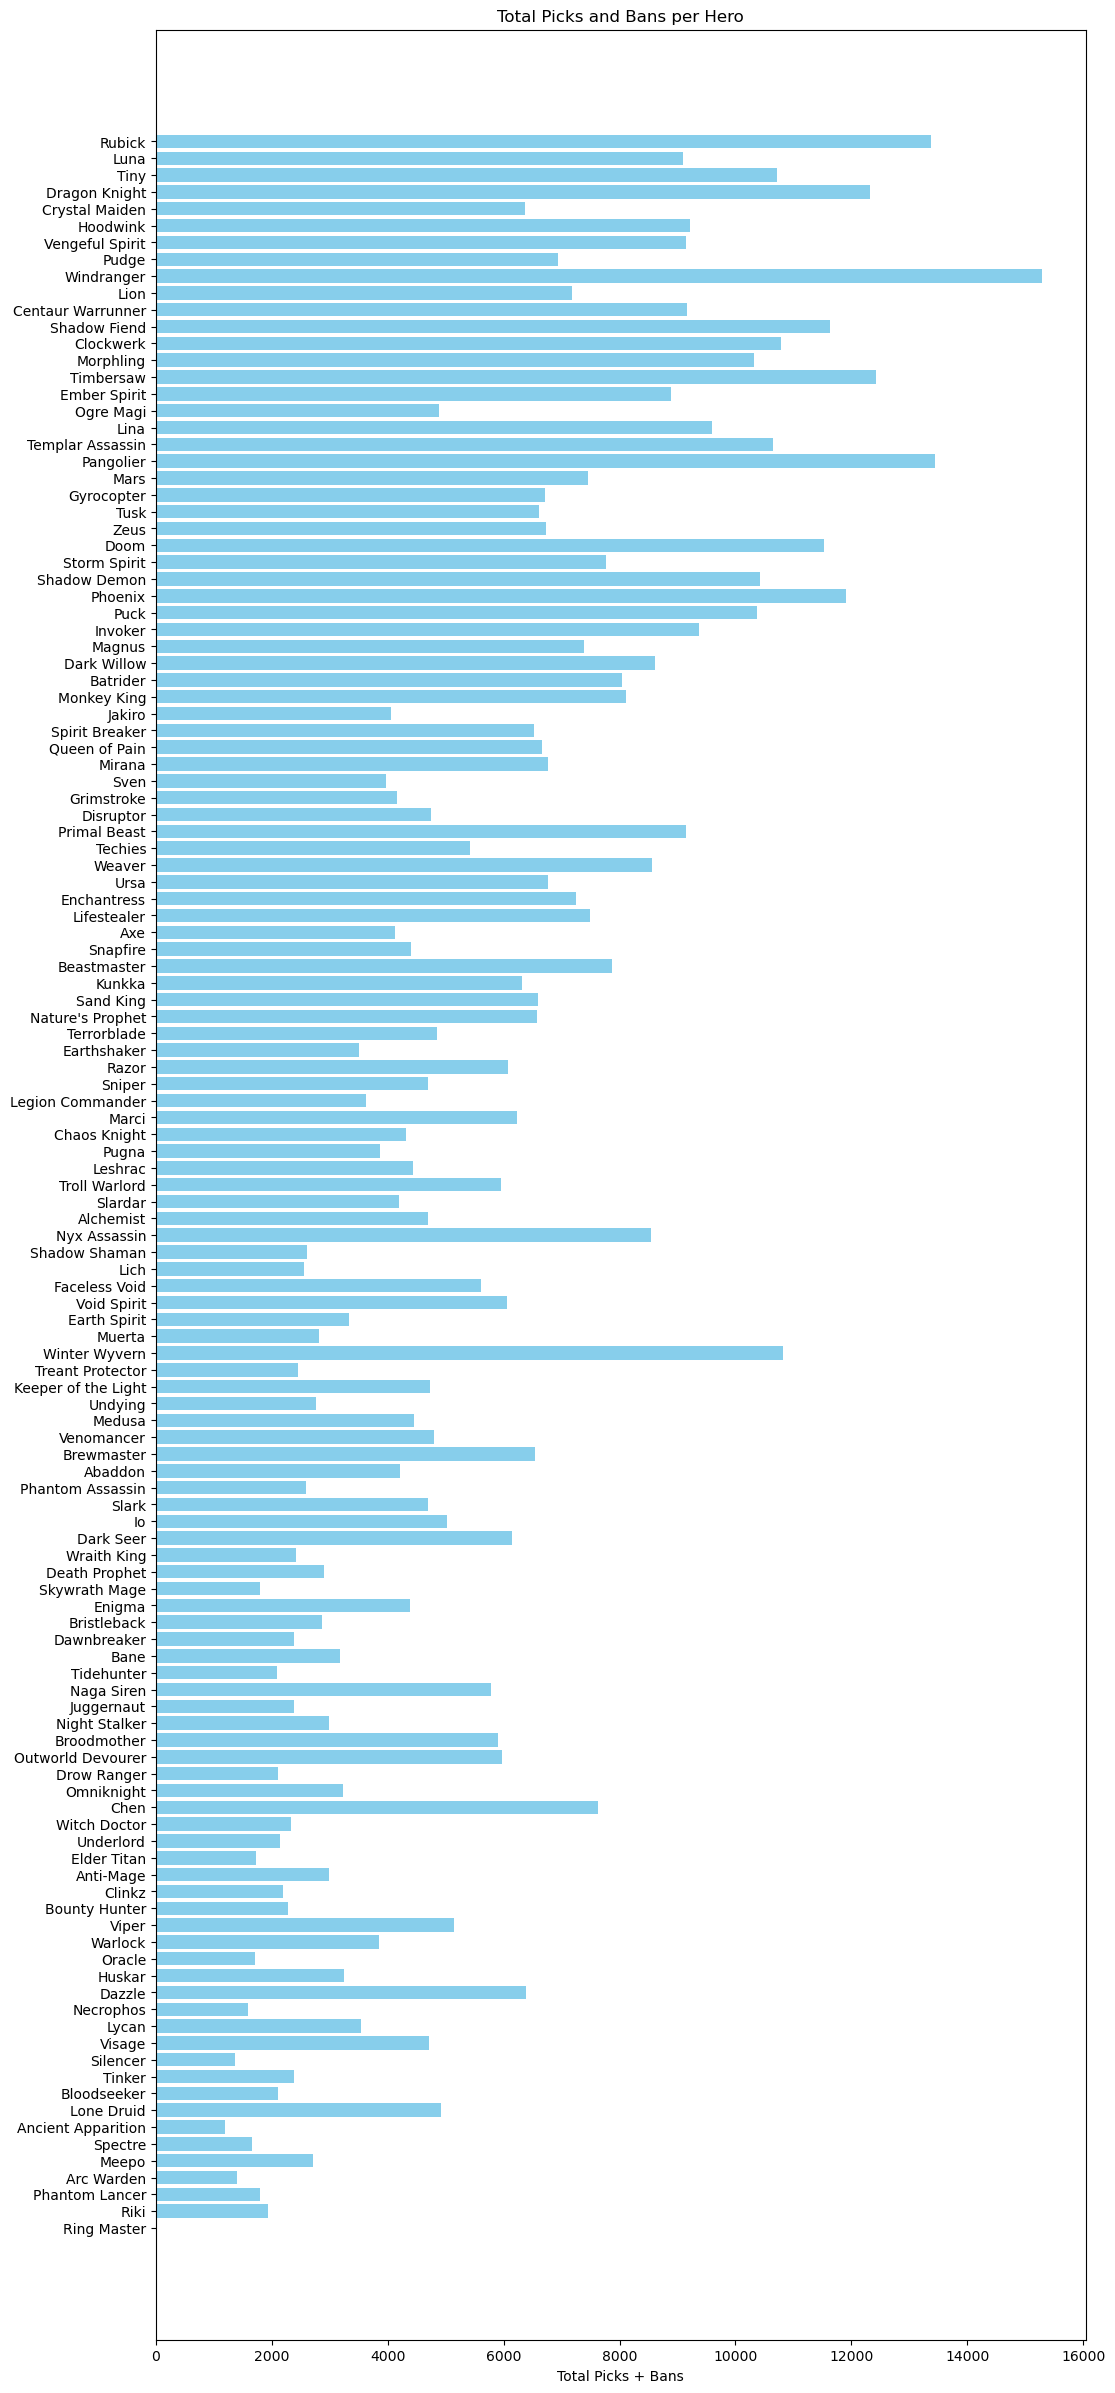

     hero_id  localized_name  total_picks  total_bans  cluster
84        86          Rubick         8238        5145        2
46        48            Luna         5974        3118        0
18        19            Tiny         5953        4760        2
47        49   Dragon Knight         5455        6863        2
4          5  Crystal Maiden         5413         953        1
..       ...             ...          ...         ...      ...
80        82           Meepo          664        2044        1
111      113      Arc Warden          489         909        1
11        12  Phantom Lancer          425        1378        1
30        32            Riki          420        1518        1
120      131     Ring Master            2           0        1

[125 rows x 5 columns]


In [106]:
plt.figure(figsize=(12, 30))
hero_stats.sort_values('total_picks', ascending=False, inplace=True)
plt.barh(hero_stats['localized_name'], hero_stats['total_picks'] + hero_stats['total_bans'], color='skyblue')
plt.xlabel('Total Picks + Bans')
plt.title('Total Picks and Bans per Hero')
plt.gca().invert_yaxis()
plt.show()
print(hero_stats)